# Space Efficiency Comparison of Data Exchange Formats

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import LogNorm

## Basic analysis and preparation

In [25]:
df = pd.read_excel('../results/fileSizes.xlsx', names=["Use Cases", "Data Formats", "File Size"]).convert_dtypes()

c:\Users\Bianca\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Use Cases     224 non-null    string
 1   Data Formats  224 non-null    string
 2   File Size     224 non-null    Int64 
dtypes: Int64(1), string(2)
memory usage: 5.6 KB


In [27]:
# shorten names of data formats
df = df.replace({'Data Formats': ['Cap\'n Proto (packed)', 'Cap\'n Proto (unpacked)', 'CSV (with header)', 'Ion Binary', 'Java Serialization']}, 
                {'Data Formats': ['Cap\'n (packed)', 'Cap\'n (unpacked)', 'CSV (header)', 'Ion (binary)', 'Java']})

In [28]:
use_cases = df["Use Cases"].sort_values().unique()
use_cases_without_image = np.delete(use_cases, np.where(use_cases == "ImageData"))
formats = df["Data Formats"].unique()

print(use_cases)
print(formats)

<StringArray>
[           'HeartData',         'HttpResponse',            'ImageData',
      'ImageDescriptor',         'LocationData',               'Person',
          'SensorValue', 'SmartLightController']
Length: 8, dtype: string
<StringArray>
[            'Avro',             'BSON',   "Cap'n (packed)",
 "Cap'n (unpacked)",             'CBOR',              'CSV',
     'CSV (header)',              'EXI',      'FlatBuffers',
      'FlexBuffers',          'Hessian',              'INI',
              'Ion',     'Ion (binary)',             'Java',
             'JSON',      'MessagePack',         'Protobuf',
              'RDF',       'RDF Turtle',            'Smile',
              'TLV',             'TOML',           'Thrift',
           'UBJSON',              'XDR',              'XML',
             'YAML']
Length: 28, dtype: string


In [29]:
dfa = df.pivot(index="Data Formats", columns="Use Cases", values="File Size")
dfa = dfa.astype('float64')
dfa.head()

Use Cases,HeartData,HttpResponse,ImageData,ImageDescriptor,LocationData,Person,SensorValue,SmartLightController
Data Formats,,,,,,,,
Avro,73.0,448.0,861767.0,54.0,100.0,95.0,30.0,8.0
BSON,276.0,610.0,861796.0,151.0,222.0,182.0,85.0,37.0
CBOR,209.0,487.0,861787.0,105.0,178.0,140.0,77.0,25.0
CSV,95.0,459.0,1149019.0,61.0,100.0,101.0,32.0,20.0
CSV (header),189.0,495.0,1149035.0,106.0,158.0,143.0,72.0,35.0


## Visualization

### Overview

In [30]:
dfb=dfa.copy()
for k in dfa.keys():
    dfb[k] = dfb[k].div(dfa[k].min()).round(2).astype('float64')
dfb = dfb.transpose()
dfb.head()

Data Formats,Avro,BSON,CBOR,CSV,CSV (header),Cap'n (packed),Cap'n (unpacked),EXI,FlatBuffers,FlexBuffers,...,RDF,RDF Turtle,Smile,TLV,TOML,Thrift,UBJSON,XDR,XML,YAML
Use Cases,,,,,,,,,,,,,,,,,,,,,
HeartData,1.0,3.78,2.86,1.30,2.59,1.44,2.52,3.36,2.85,4.05,...,17.74,10.55,3.00,3.18,3.79,2.18,3.15,1.42,5.71,4.04
HttpResponse,1.0,1.36,1.09,1.02,1.10,1.19,1.45,2.10,1.40,1.27,...,6.19,1.33,1.09,1.08,1.19,1.14,1.14,1.15,2.10,1.25
ImageData,1.0,1.00,1.00,1.33,1.33,1.00,1.00,1.35,1.00,1.00,...,1.33,1.33,1.14,1.00,1.33,1.00,1.00,1.00,1.35,1.39
ImageDescriptor,1.0,2.80,1.94,1.13,1.96,1.46,2.52,2.50,2.59,2.70,...,12.52,5.89,2.04,2.46,2.50,1.85,2.35,1.63,4.17,2.39
LocationData,1.0,2.22,1.78,1.00,1.58,1.33,1.92,3.36,2.00,2.19,...,8.04,5.13,1.82,1.73,2.18,1.45,1.98,1.20,3.36,2.08


Text(274.75, 0.5, 'Use Cases')

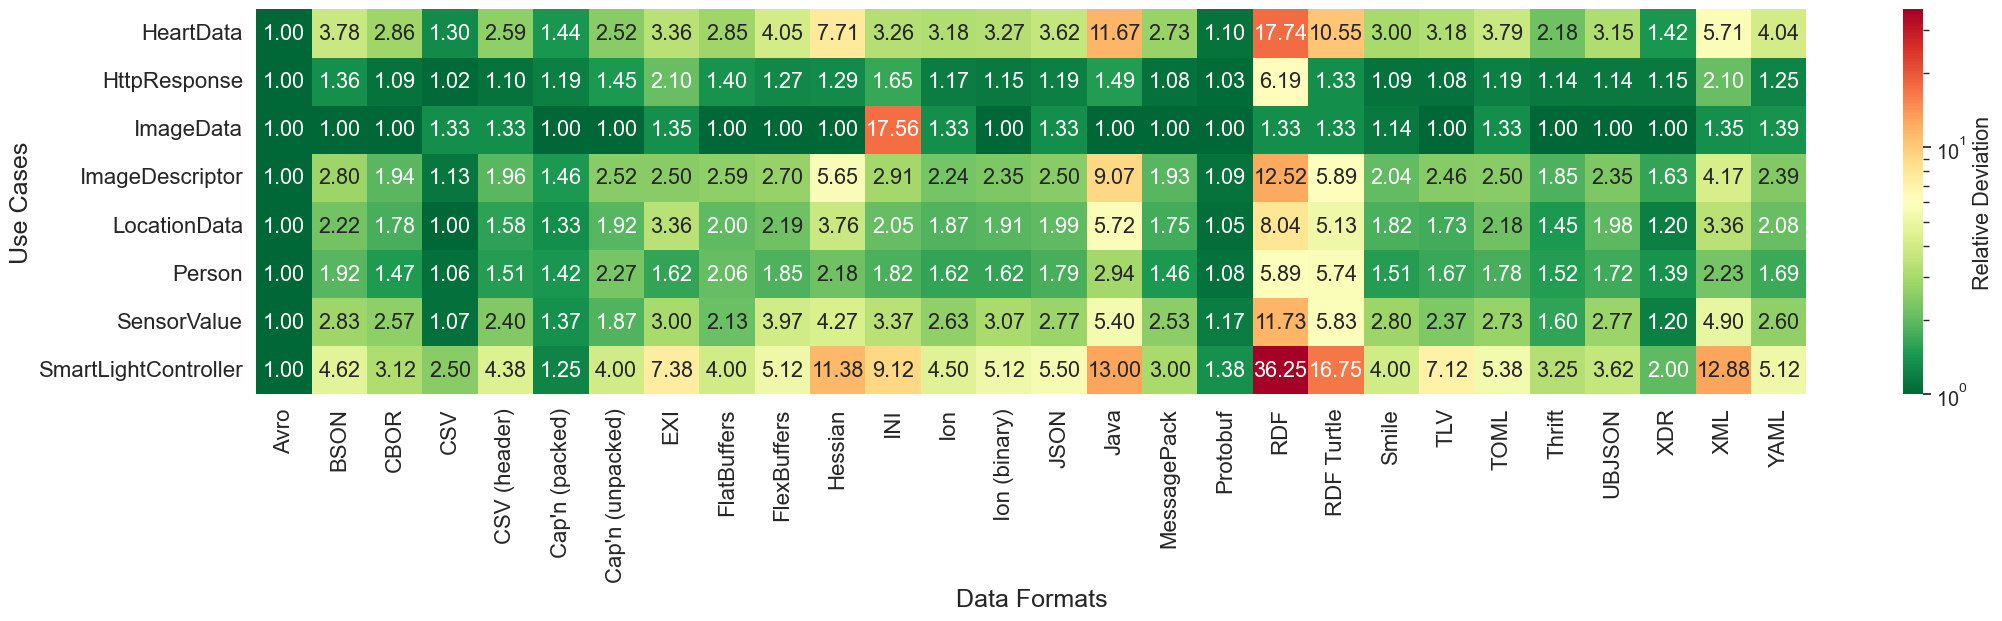

In [31]:
# Plot heatmap of relative deviations form best data format per use case
plt.figure(figsize=(25, 5))
sns.set(font_scale=1.3)
g = sns.heatmap(
    dfb,
    annot=True,
    cmap="RdYlGn_r",
    fmt=".2f",
    cbar_kws={"label": "Relative Deviation"},
    norm=LogNorm(),  
)

plt.xticks(fontsize=16) 
plt.yticks(fontsize=16)
plt.xlabel("Data Formats", fontsize=18) 
plt.ylabel("Use Cases", fontsize=18) 

In [32]:
# drop image data and repeat
dfc=dfb.drop(['ImageData'])
dfc.head()

Data Formats,Avro,BSON,CBOR,CSV,CSV (header),Cap'n (packed),Cap'n (unpacked),EXI,FlatBuffers,FlexBuffers,...,RDF,RDF Turtle,Smile,TLV,TOML,Thrift,UBJSON,XDR,XML,YAML
Use Cases,,,,,,,,,,,,,,,,,,,,,
HeartData,1.0,3.78,2.86,1.30,2.59,1.44,2.52,3.36,2.85,4.05,...,17.74,10.55,3.00,3.18,3.79,2.18,3.15,1.42,5.71,4.04
HttpResponse,1.0,1.36,1.09,1.02,1.10,1.19,1.45,2.10,1.40,1.27,...,6.19,1.33,1.09,1.08,1.19,1.14,1.14,1.15,2.10,1.25
ImageDescriptor,1.0,2.80,1.94,1.13,1.96,1.46,2.52,2.50,2.59,2.70,...,12.52,5.89,2.04,2.46,2.50,1.85,2.35,1.63,4.17,2.39
LocationData,1.0,2.22,1.78,1.00,1.58,1.33,1.92,3.36,2.00,2.19,...,8.04,5.13,1.82,1.73,2.18,1.45,1.98,1.20,3.36,2.08
Person,1.0,1.92,1.47,1.06,1.51,1.42,2.27,1.62,2.06,1.85,...,5.89,5.74,1.51,1.67,1.78,1.52,1.72,1.39,2.23,1.69


Text(274.75, 0.5, 'Use Cases')

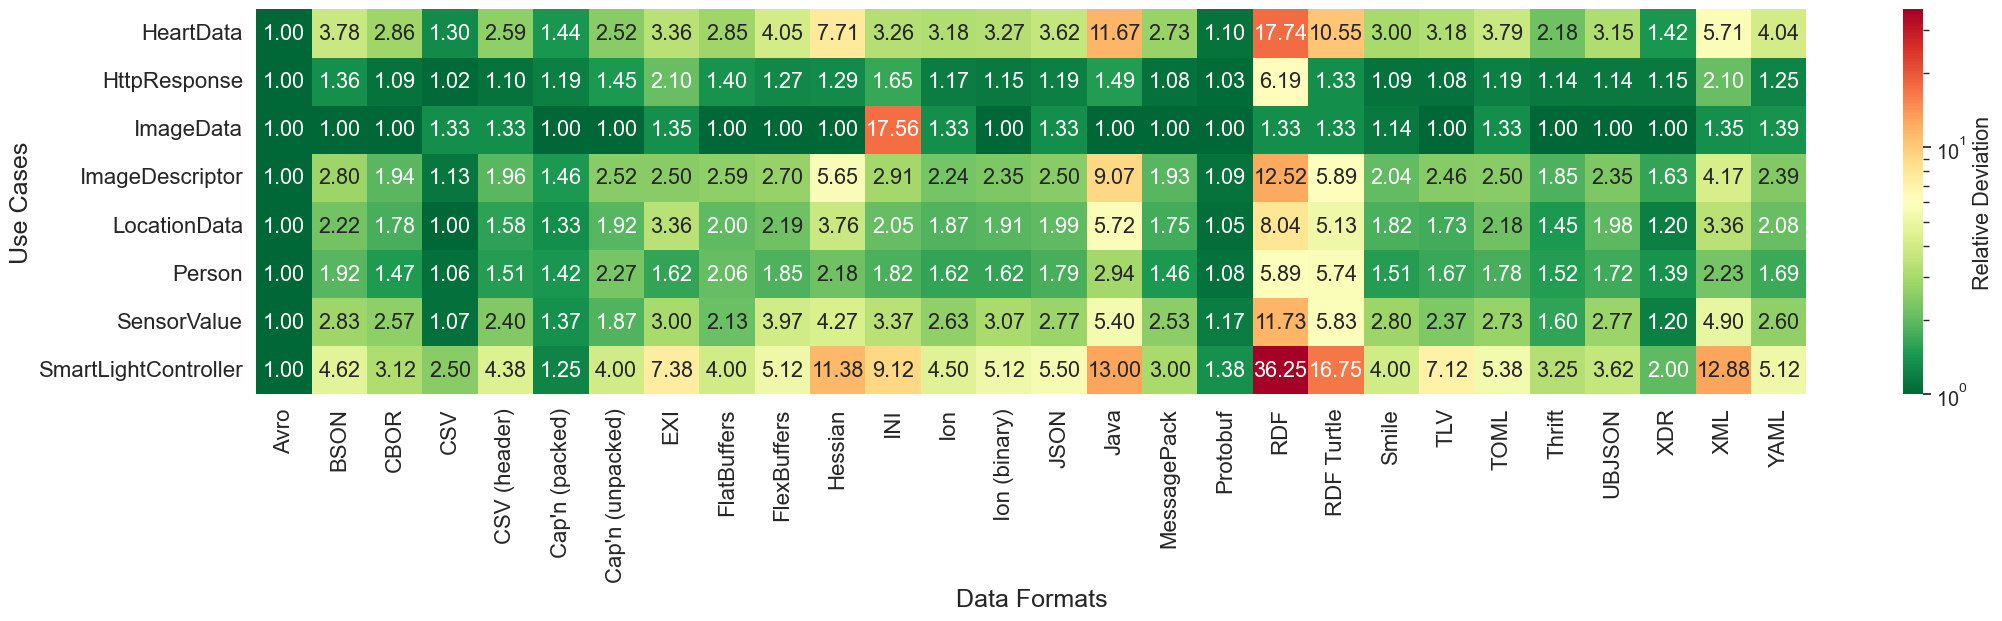

In [33]:
# Plot heatmap of relative deviations form best data format per use case (without image)
plt.figure(figsize=(25, 5))
sns.set(font_scale=1.3)
g = sns.heatmap(
    dfb,
    annot=True,
    cmap="RdYlGn_r",
    fmt=".2f",
    cbar_kws={"label": "Relative Deviation"},
    norm=LogNorm(),  
)

plt.xticks(fontsize=16) 
plt.yticks(fontsize=16)
plt.xlabel("Data Formats", fontsize=18) 
plt.ylabel("Use Cases", fontsize=18) 

### Comparison to JSON

In [34]:
dfd=pd.DataFrame()
for t in dfa.keys():
    if t != 'ImageData':
        dft=pd.DataFrame()
        dft['Use Cases'] = list([t,t,t,t])
        w = list(dfa.nsmallest(3,t)[t].index)
        w.append('JSON')
        dft['Data Formats'] = w
        x = list(dfa.nsmallest(3,t)[t])
        x.append(dfa[t].loc['JSON'])     
        dft['File Size']= x
        dfd = pd.concat([dfd,dft])
dfd

,Use Cases,Data Formats,File Size
0,HeartData,Avro,73.0
1,HeartData,Protobuf,80.0
2,HeartData,CSV,95.0
3,HeartData,JSON,264.0
0,HttpResponse,Avro,448.0
1,HttpResponse,CSV,459.0
2,HttpResponse,Protobuf,460.0
3,HttpResponse,JSON,532.0
0,ImageDescriptor,Avro,54.0
1,ImageDescriptor,Protobuf,59.0


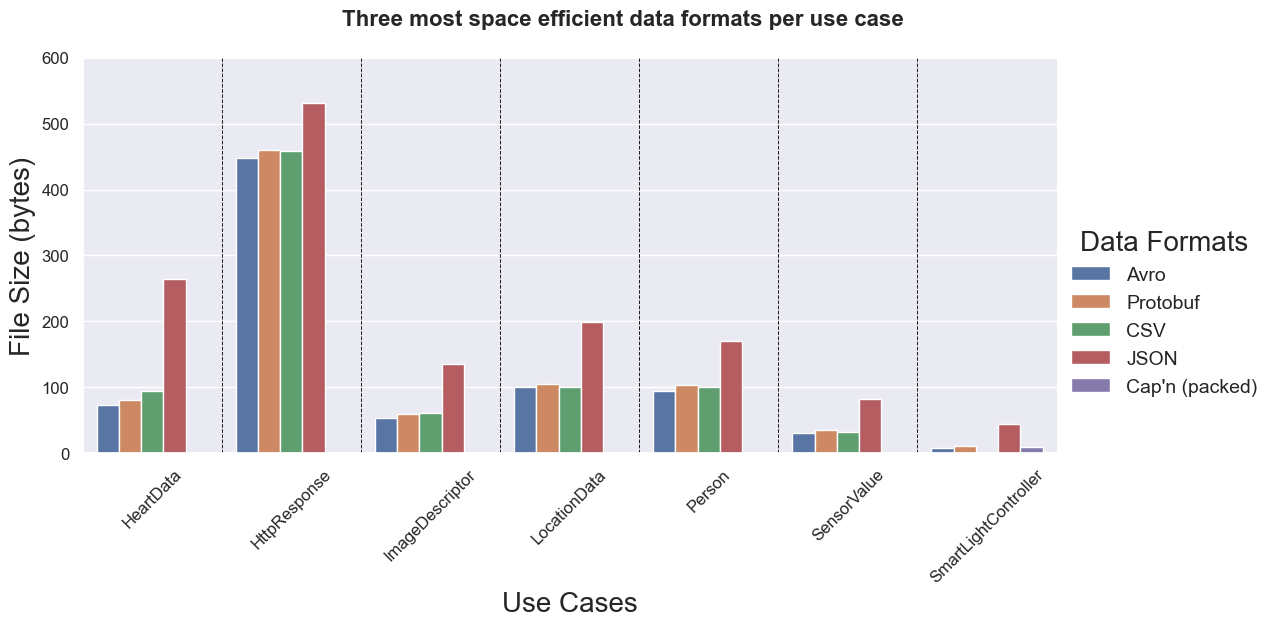

In [35]:
# visualize the 3 data formats that had the smallest file sizes per use case
ax=sns.catplot(
    x="Use Cases",       
    y="File Size",       
    hue="Data Formats",
    height=5,
    data=dfd,     
    kind="bar",
    aspect=2.2,
    legend=True
)
ax.set(ylim=(0, 532))
ax.set(xlim=(-0.5, 6.5))
ax.set_xticklabels(fontsize=12,rotation=45)
ax.set_yticklabels(fontsize=12)
ax.set_xlabels(fontsize=20)
ax.set_ylabels("File Size (bytes)", fontsize=20)
ax.fig.suptitle("Three most space efficient data formats per use case", fontsize=16, fontweight='bold', y=1.05)
plt.axvline(x = 0.5, ymin=0, ymax=1, color = 'k',linestyle='--',linewidth=0.7)
plt.axvline(x = 1.5, ymin=0, ymax=1, color = 'k',linestyle='--',linewidth=0.7)
plt.axvline(x = 2.5, ymin=0, ymax=1, color = 'k',linestyle='--',linewidth=0.7)
plt.axvline(x = 3.5, ymin=0, ymax=1, color = 'k',linestyle='--',linewidth=0.7)
plt.axvline(x = 4.5, ymin=0, ymax=1, color = 'k',linestyle='--',linewidth=0.7)
plt.axvline(x = 5.5, ymin=0, ymax=1, color = 'k',linestyle='--',linewidth=0.7)
plt.axvline(x = 6.5, ymin=0, ymax=1, color = 'k',linestyle='--',linewidth=0.7)
plt.setp(ax._legend.get_title(), fontsize=20)
plt.setp(ax._legend.get_texts(), fontsize=14)

plt.show()

In [36]:
dfi= dfa.copy()
for k in dfi.keys():
    if k != 'ImageData':
        dfi = dfi.drop(k,axis=1)
dfi['image_rel'] = dfi['ImageData'].div(dfa['ImageData'].iloc[15])
dfi['Data Formats'] = dfi.index
dfi

Use Cases,ImageData,image_rel,Data Formats
Data Formats,,,
Avro,861767.0,0.999839,Avro
BSON,861796.0,0.999872,BSON
CBOR,861787.0,0.999862,CBOR
CSV,1149019.0,1.333114,CSV
CSV (header),1149035.0,1.333133,CSV (header)
Cap'n (packed),863279.0,1.001593,Cap'n (packed)
Cap'n (unpacked),861816.0,0.999896,Cap'n (unpacked)
EXI,1164167.0,1.350689,EXI
FlatBuffers,861796.0,0.999872,FlatBuffers


Text(0.5, 1.01, 'Image data test case')

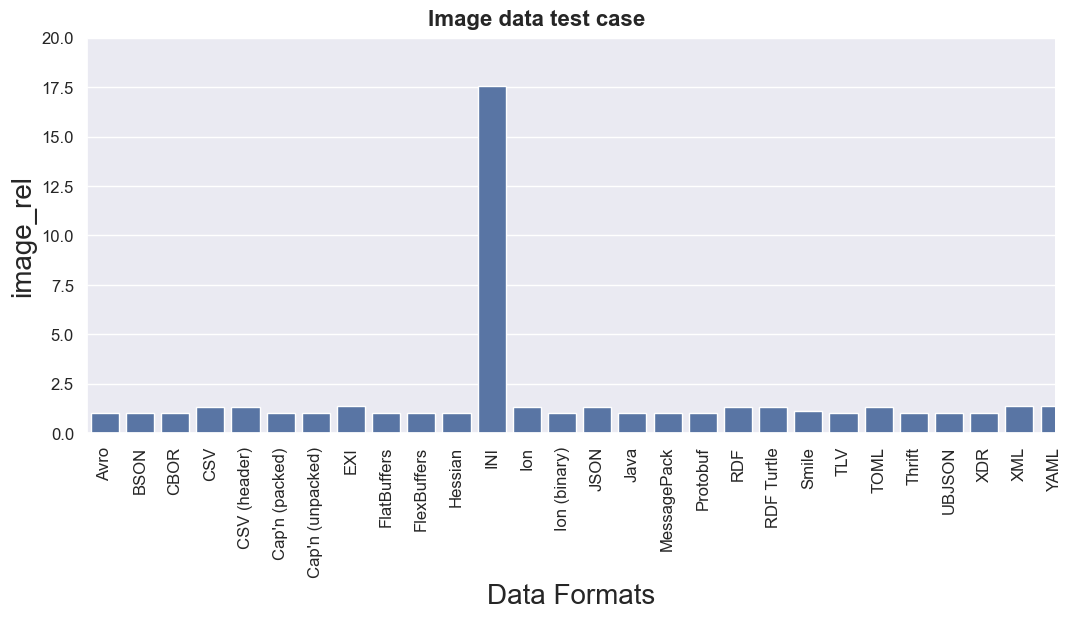

In [37]:
# visualize values of the image use case (relative values instead of absolute)
ax=sns.catplot(
    x="Data Formats",       
    y="image_rel", 
    hue=None,
    height=5,
    data=dfi,     
    kind="bar",
    aspect=2.2,
    legend=False
)
ax.set(ylim=(0, 20))
ax.set(xlim=(-0.5, 7))
ax.set_xticklabels(fontsize=12,rotation=90)
ax.set_yticklabels(fontsize=12)
ax.set_xlabels(fontsize=20)
ax.set_ylabels(fontsize=20)
ax.fig.suptitle("Image data test case", fontsize=16, fontweight='bold', y=1.01)

In [38]:
base_values = df[df["Data Formats"] == "JSON"]

def percentage_change(value, base): 
    increase = value - base
    return round((increase / base) * 100, 2)

def create_change_df(data, with_image = False): 
    change_df = pd.DataFrame(columns=["Use Cases", "Data Formats", "File Size", "Relative", "Change"])

    for i, row in data.iterrows(): 
        value = row["File Size"]
        case = row["Use Cases"]
        if not with_image and case == "ImageData": continue 
        base = base_values.loc[base_values["Use Cases"] == case]
        base = base["File Size"].iloc[0]
        relative = round(value / base, 2)

        change_df.loc[i] = [case, row["Data Formats"], value, relative, percentage_change(value, base)]
        
    return change_df
    
change_df = create_change_df(df)
change_df = change_df[change_df["Data Formats"] != "JSON"] # remove json value because change is always 0
change_df

,Use Cases,Data Formats,File Size,Relative,Change
0,HeartData,Avro,73,0.28,-72.35
1,HeartData,BSON,276,1.05,4.55
2,HeartData,Cap'n (packed),105,0.40,-60.23
3,HeartData,Cap'n (unpacked),184,0.70,-30.30
4,HeartData,CBOR,209,0.79,-20.83
...,...,...,...,...,...
219,SmartLightController,Thrift,26,0.59,-40.91
220,SmartLightController,UBJSON,29,0.66,-34.09
221,SmartLightController,XDR,16,0.36,-63.64
222,SmartLightController,XML,103,2.34,134.09


In [39]:
pivot_df = change_df.pivot(index='Data Formats', columns='Use Cases', values='Change')
pivot_df

Use Cases,HeartData,HttpResponse,ImageDescriptor,LocationData,Person,SensorValue,SmartLightController
Data Formats,,,,,,,
Avro,-72.35,-15.79,-60.00,-49.75,-44.12,-63.86,-81.82
BSON,4.55,14.66,11.85,11.56,7.06,2.41,-15.91
CBOR,-20.83,-8.46,-22.22,-10.55,-17.65,-7.23,-43.18
CSV,-64.02,-13.72,-54.81,-49.75,-40.59,-61.45,-54.55
CSV (header),-28.41,-6.95,-21.48,-20.60,-15.88,-13.25,-20.45
Cap'n (packed),-60.23,0.19,-41.48,-33.17,-20.59,-50.60,-77.27
Cap'n (unpacked),-30.30,21.80,0.74,-3.52,27.06,-32.53,-27.27
EXI,-7.20,76.88,0.00,68.84,-9.41,8.43,34.09
FlatBuffers,-21.21,18.05,3.70,0.50,15.29,-22.89,-27.27


In [40]:
dfd=pd.DataFrame()
for t in pivot_df.keys():
    if t != 'ImageData':
        dft=pd.DataFrame()
        dft['Use Cases'] = list([t,t,t])
        w = list(pivot_df.nsmallest(3,t)[t].index)
        dft['Data Formats'] = w
        x = list(pivot_df.nsmallest(3,t)[t])
        dft['Difference']= x
        dfd = pd.concat([dfd,dft])
dfd

,Use Cases,Data Formats,Difference
0,HeartData,Avro,-72.35
1,HeartData,Protobuf,-69.70
2,HeartData,CSV,-64.02
0,HttpResponse,Avro,-15.79
1,HttpResponse,CSV,-13.72
2,HttpResponse,Protobuf,-13.53
0,ImageDescriptor,Avro,-60.00
1,ImageDescriptor,Protobuf,-56.30
2,ImageDescriptor,CSV,-54.81
0,LocationData,Avro,-49.75


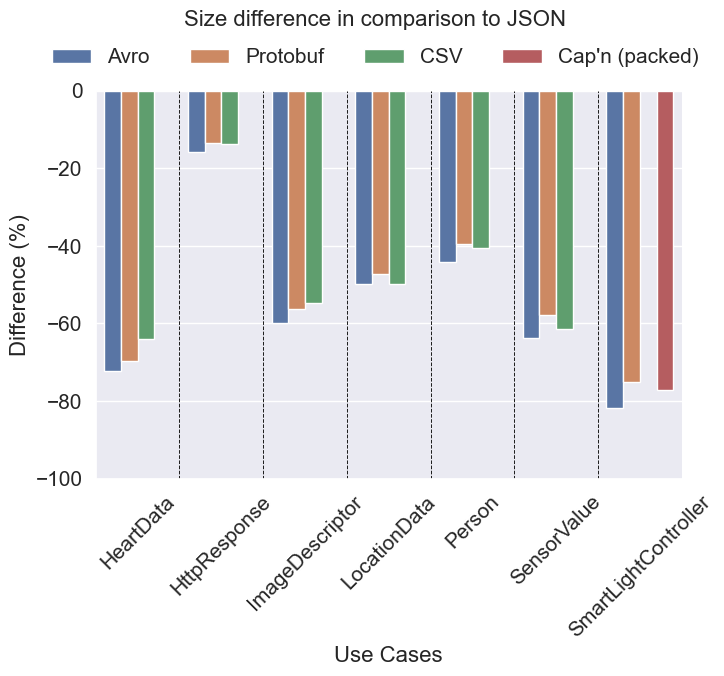

In [ ]:
# visualize the difference in measured speed of the three best data formats per use case in comparison to json 
ax=sns.catplot(
    x="Use Cases",       
    y="Difference",       
    hue="Data Formats",
    height=5,
    data=dfd,     
    kind="bar",
    aspect=1.5,
    legend=True,
    legend_out=False,
    order=use_cases_without_image
)
ax.set(ylim=(-100, 0))
ax.set(xlim=(-0.5, 6.5))
ax.set_xticklabels(fontsize=15,rotation=45)
ax.set_yticklabels(fontsize=15)
ax.set_xlabels(fontsize=16)
ax.set_ylabels("Difference (%)", fontsize=16)
plt.suptitle("Size difference in comparison to JSON", fontsize=16, y=1.1)
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 0.95), ncol=5, title=None, frameon=False,
)
plt.axvline(x = 0.5, ymin=0, ymax=1, color = 'k',linestyle='--',linewidth=0.7)
plt.axvline(x = 1.5, ymin=0, ymax=1, color = 'k',linestyle='--',linewidth=0.7)
plt.axvline(x = 2.5, ymin=0, ymax=1, color = 'k',linestyle='--',linewidth=0.7)
plt.axvline(x = 3.5, ymin=0, ymax=1, color = 'k',linestyle='--',linewidth=0.7)
plt.axvline(x = 4.5, ymin=0, ymax=1, color = 'k',linestyle='--',linewidth=0.7)
plt.axvline(x = 5.5, ymin=0, ymax=1, color = 'k',linestyle='--',linewidth=0.7)
plt.axvline(x = 6.5, ymin=0, ymax=1, color = 'k',linestyle='--',linewidth=0.7)
plt.setp(ax._legend.get_texts(), fontsize=15)

plt.show()

### Comparison of categories

In [42]:
categories = ["Binary", "Textual", "Schema-driven", "Schema-less"]
binary_formats = ["Avro", "BSON", "Cap'n (packed)", "Cap'n (unpacked)", "CBOR", "EXI", "FlatBuffers", "FlexBuffers", "Hessian", "Ion (binary)", "Java", "MessagePack", "Protobuf", "Smile", "Thrift", "TLV", "UBJSON", "XDR"]
textual_formats =  ["CSV (header)", "CSV", "INI", "Ion", "JSON", "RDF", "TOML", "XML", "YAML"]

schema_driven_formats = ["Avro", "Cap'n (packed)", "Cap'n (unpacked)", "FlatBuffers", "Protobuf", "Thrift", "XDR"]
schema_less_formats = ["BSON", "CBOR", "CSV (header)", "CSV", "EXI", "FlexBuffers", "Hessian", "INI", "Ion", "Ion (binary)", "Java", "JSON", "MessagePack", "RDF", "Smile", "TLV", "TOML", "UBJSON", "XML", "YAML"]

binary_df = df[np.isin(df, binary_formats).any(axis=1)]
textual_df = df[np.isin(df, textual_formats).any(axis=1)]
schema_driven_df = df[np.isin(df, schema_driven_formats).any(axis=1)]
schema_less_df = df[np.isin(df, schema_less_formats).any(axis=1)]

In [43]:
binary_df.insert(0, "Format Type", "Binary")
textual_df.insert(0, "Format Type","Textual")
schema_driven_df.insert(0, "Format Type","Schema-Driven")
schema_less_df.insert(0, "Format Type","Schema-Less")

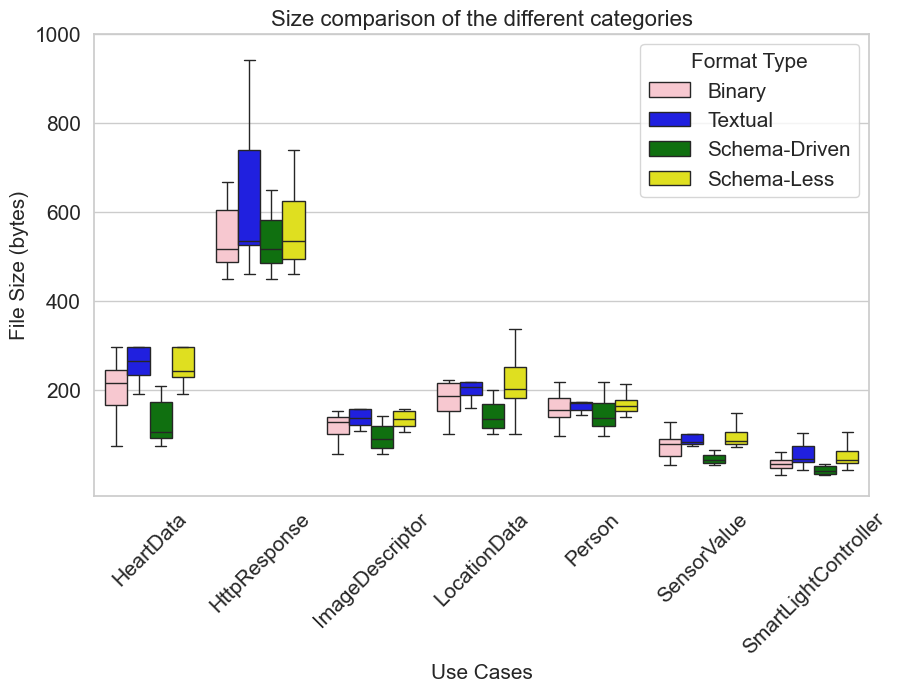

In [44]:
# visualize the different categories and their performance differences
df_combined = pd.concat([binary_df, textual_df, schema_driven_df, schema_less_df])
df_combined = df_combined[df_combined["Use Cases"] != "ImageData"]

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.boxplot(
    x="Use Cases", 
    y="File Size", 
    hue="Format Type",  
    data=df_combined, 
    order=use_cases_without_image,
    palette={"Binary": "pink", "Textual": "blue", "Schema-Driven": "green", "Schema-Less": "yellow"}, 
    showfliers=False,
)

plt.title("Size comparison of the different categories", fontsize=16)
plt.ylabel("File Size (bytes)", fontsize=15)
plt.xlabel("Use Cases", fontsize=15)
ax.set_xticks(use_cases_without_image)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=15)
ax.set_yticks([200, 400, 600, 800, 1000])
ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)
plt.legend(title="Format Type", fontsize=15, title_fontsize=15)
plt.show()

In [45]:
dfd=pd.DataFrame()
for t in pivot_df.keys():
    if t != 'ImageData':
        dft=pd.DataFrame()
        dft['Use Cases'] = list([t,t,t])
        w = list(pivot_df.nsmallest(3,t)[t].index)
        dft['Data Formats'] = w
        x = list(pivot_df.nsmallest(3,t)[t])
        dft['Difference']= x
        dfd = pd.concat([dfd,dft])
dfd

,Use Cases,Data Formats,Difference
0,HeartData,Avro,-72.35
1,HeartData,Protobuf,-69.70
2,HeartData,CSV,-64.02
0,HttpResponse,Avro,-15.79
1,HttpResponse,CSV,-13.72
2,HttpResponse,Protobuf,-13.53
0,ImageDescriptor,Avro,-60.00
1,ImageDescriptor,Protobuf,-56.30
2,ImageDescriptor,CSV,-54.81
0,LocationData,Avro,-49.75


## Demonstation of energy savings

Assuming a standard occupancy sensor that transmits a data packet per second 

In [46]:
#assumtions:
working_hours = 24
data_points_per_sec = 1
data_point_per_hour = data_points_per_sec*60*60
sensor_protobuf = dfa['SensorValue'].loc['Protobuf']
sensor_json = dfa['SensorValue'].loc['JSON']

time_range=np.array(range(0,31))
print(time_range)

space_proto = time_range * sensor_protobuf * data_point_per_hour * working_hours
print(space_proto)

space_json = time_range * sensor_json * data_point_per_hour * working_hours
print(space_json)

dfs=pd.DataFrame()
dfs['time']=time_range
dfs['Protobuf']=space_proto
dfs['JSON']=space_json
dfs['Protobuf (MB)'] = dfs['Protobuf'].div(1024*1024)
dfs['JSON (MB)'] =  dfs['JSON'].div(1024*1024)
dfs

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]
[       0.  3024000.  6048000.  9072000. 12096000. 15120000. 18144000.
 21168000. 24192000. 27216000. 30240000. 33264000. 36288000. 39312000.
 42336000. 45360000. 48384000. 51408000. 54432000. 57456000. 60480000.
 63504000. 66528000. 69552000. 72576000. 75600000. 78624000. 81648000.
 84672000. 87696000. 90720000.]
[0.000000e+00 7.171200e+06 1.434240e+07 2.151360e+07 2.868480e+07
 3.585600e+07 4.302720e+07 5.019840e+07 5.736960e+07 6.454080e+07
 7.171200e+07 7.888320e+07 8.605440e+07 9.322560e+07 1.003968e+08
 1.075680e+08 1.147392e+08 1.219104e+08 1.290816e+08 1.362528e+08
 1.434240e+08 1.505952e+08 1.577664e+08 1.649376e+08 1.721088e+08
 1.792800e+08 1.864512e+08 1.936224e+08 2.007936e+08 2.079648e+08
 2.151360e+08]


,time,Protobuf,JSON,Protobuf (MB),JSON (MB)
0,0,0.0,0.0,0.000000,0.000000
1,1,3024000.0,7171200.0,2.883911,6.838989
2,2,6048000.0,14342400.0,5.767822,13.677979
3,3,9072000.0,21513600.0,8.651733,20.516968
4,4,12096000.0,28684800.0,11.535645,27.355957
5,5,15120000.0,35856000.0,14.419556,34.194946
6,6,18144000.0,43027200.0,17.303467,41.033936
7,7,21168000.0,50198400.0,20.187378,47.872925
8,8,24192000.0,57369600.0,23.071289,54.711914
9,9,27216000.0,64540800.0,25.955200,61.550903
